#### **7-5. Regression**

In [2]:
import pandas as pd
import numpy as np

house_raw=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/kc_house_data.csv')
house = house_raw [['price','sqft_living']]
#독립변수와 종속변수의 선형 가정
house.corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


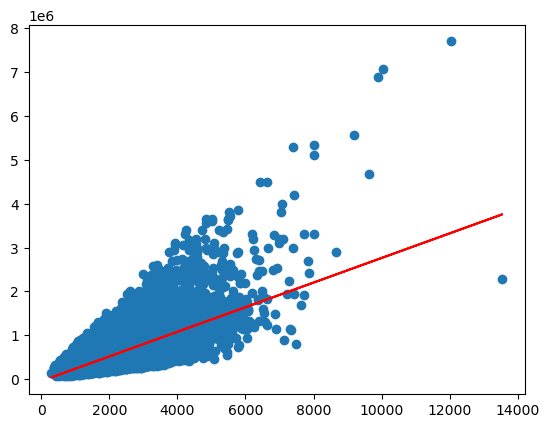

In [6]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

y = house ['price']
x = house ['sqft_living']

lr = ols ('price ~ sqft_living', data=house).fit()
y_pred = lr.predict(x)

plt.scatter(x,y)
plt.plot (x,y_pred, color='red')

In [7]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Tue, 25 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:04:35   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
import pandas as pd
import numpy as np

cars=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/Cars93.csv')
#cars_raw.info()
cars.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i


In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#OLS 모델의 formula 정의시, 일부 특수문자는 쓸 수 없기에 컬럼에 특수문자 제거
cars.columns = cars.columns.str.replace('.','')
model = smf.ols (formula = 'Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway', data=cars)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           4.88e-14
Time:                        11:26:35   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
cars[['EngineSize','RPM','Weight','Length','MPGcity','MPGhighway']].corr()

,EngineSize,RPM,Weight,Length,MPGcity,MPGhighway
EngineSize,1.000000,-0.547898,0.845075,0.780283,-0.710003,-0.626795
RPM,-0.547898,1.000000,-0.427931,-0.441249,0.363045,0.313469
Weight,0.845075,-0.427931,1.000000,0.806274,-0.843139,-0.810658
Length,0.780283,-0.441249,0.806274,1.000000,-0.666239,-0.542897
MPGcity,-0.710003,0.363045,-0.843139,-0.666239,1.000000,0.943936
MPGhighway,-0.626795,0.313469,-0.810658,-0.542897,0.943936,1.000000


In [22]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속, 독립변수를 데이터프레임으로 나누어 저장
y, x = dmatrices ('Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway', data=cars, return_type = 'dataframe')

vif_list = []
for i in range(1,len(x.columns)):
    vif_list.append([variance_inflation_factor(x.values,i),x.columns[i]])
pd.DataFrame(vif_list, columns=['vif','variables'])

,vif,variables
0,4.605118,EngineSize
1,1.446859,RPM
2,8.685973,Weight
3,4.013002,Length
4,13.668288,MPGcity
5,12.943133,MPGhighway


In [23]:
model = smf.ols (formula = 'Price ~ EngineSize + RPM + Weight + Length + MPGhighway', data=cars)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     22.95
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           1.28e-14
Time:                        11:45:14   Log-Likelihood:                -303.27
No. Observations:                  93   AIC:                             618.5
Df Residuals:                      87   BIC:                             633.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.8122     17.158     -2.087      0.040     -69.916      -1.709
EngineSize     4.6591      1.386      3.361      0.001       1.904       7.415
RPM            0.0071      0.001      5.173      0.000       0.004       0.010
Weight         0.0053      0.003      1.567      0.121      -0.001       0.012
Length        -0.0194      0.087     -0.224      0.823      -0.191       0.153
MPGhighway    -0.2500      0.231     -1.082      0.282      -0.709       0.209
==============================================================================
Omnibus:                       61.903   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.806
Skew:                           2.044   Prob(JB):                     1.00e-79
Kurtosis:                      11.785   Cond. No.                     1.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
import time
import itertools

def processSubset (x,y,feature_set):
    model = sm.OLS (y,x[list(feature_set)])
    regr = model.fit()
    AIC = regr.aic
    return {'model':regr,'AIC':AIC}

def forward (x,y,predictors):
    remaining_predictors = [p for p in x.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append (processSubset (x,y,predictors+[p]+['Intercept']))

    models = pd.DataFrame(results)
    best_model = models.loc[models['AIC'].argmin()]
    print('Processed', models.shape[0], 'models on', len(predictors)+1, 'predictors in')
    print('Selected predictors:',best_model['model'].model.exog_names, 'AIC:',best_model[0])
    return best_model

def backward (x,y,predictors):
    tic = time.time()
    results = []

    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append (processSubset (x,y,list(combo)+['Intercept']))

    models = pd.DataFrame(results)
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print('Processed', models.shape[0], 'models on', len(predictors)+1, 'predictors in', (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names, 'AIC:',best_model[0])
    return best_model

def stepwise (x,y):
    stepmodels = pd.DataFrame (columns = ['AIC','model'])
    tic = time.time()
    predictors=[]
    smodel_before = processSubset (x,y,predictors+['Intercept'])['AIC']

    for i in range (1, len(x.columns.difference(['Intercept']))+1):
        forward_result = forward (x,y,predictors)
        print('forward')
        stepmodels.loc[i] = forward_result
        predictors = stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k != 'Intercept']
        backward_result = backward (x,y,predictors)

        if backward_result['AIC'] < forward_result['AIC']:
            stepmodels.loc[i] = backward_result
            predictors = stepmodels.loc[i]['model'].model.exog_names
            smodel_before = stepmodels.loc[i]['AIC']
            predictors = [k for k in predictors if k != 'Intercept']
            print('backward')
        if stepmodels.loc[i]['AIC'] > smodel_before:
            break
        else: 
            smodel_before = stepmodels.loc[i]['AIC']
    
    toc = time.time()
    print ('Total elapsed time:', (toc-tic), 'seconds.')

    return (stepmodels['model'][len(stepmodels['model'])])

In [47]:
stepwise_best_model = stepwise (x,y)

Processed 6 models on 1 predictors in
Selected predictors: ['Weight', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F217EF2DB0>
forward
Processed 1 models on 2 predictors in 0.00042891502380371094
Selected predictors: ['Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F217AB91C0>
Processed 5 models on 2 predictors in
Selected predictors: ['Weight', 'RPM', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F217EF0F50>
forward
Processed 2 models on 3 predictors in 0.0020041465759277344
Selected predictors: ['Weight', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F217EF2AE0>
Processed 4 models on 3 predictors in
Selected predictors: ['Weight', 'RPM', 'EngineSize', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001F217B340E0>
forward
Processed 3 m

C:\Users\sunwa\AppData\Local\Temp\ipykernel_7428\4288593091.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names, 'AIC:',best_model[0])
C:\Users\sunwa\AppData\Local\Temp\ipykernel_7428\4288593091.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Selected predictors:',best_model['model'].model.exog_names, 'AIC:',best_model[0])
C:\Users\sunwa\AppData\Local\Temp\ipykernel_7428\4288593091.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

In [39]:
stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           6.75e-16
Time:                        12:25:13   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### **7-6-1. Clustering: 계층적 군집**

In [51]:
import pandas as pd
import numpy as np

US=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/USArrests.csv')
US.columns=['State','Murder','Assault','UrbanPop','Rape']
label_list = US.State.tolist()
US.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


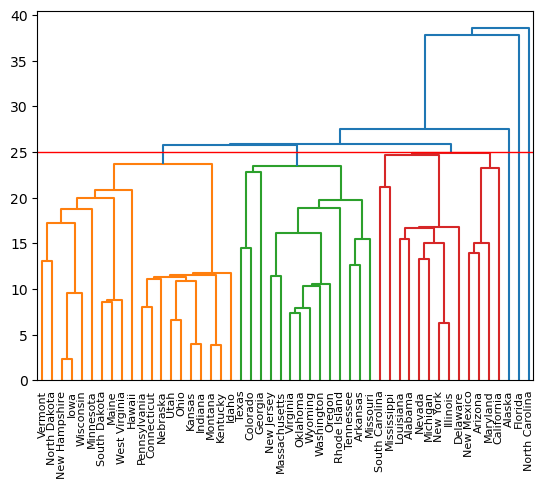

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

single = linkage (US.iloc[:,1::], metric = 'euclidean', method = 'single')

dendrogram (single, orientation = 'top', labels = label_list, distance_sort = 'descending',color_threshold=25,show_leaf_counts=True)
plt.axhline(y=25, color='r', linewidth=1)
plt.show()

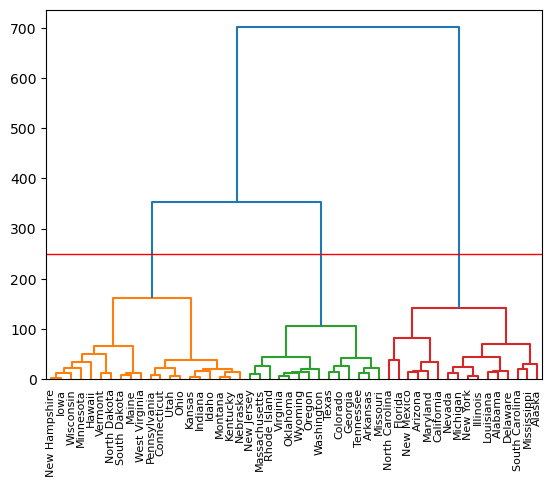

In [61]:
ward = linkage (US.iloc[:,1::], metric = 'euclidean', method = 'ward')

dendrogram (ward, orientation = 'top', labels = label_list, distance_sort = 'descending',color_threshold=250,show_leaf_counts=True)
plt.axhline(y=250, color='r', linewidth=1)
plt.show()

In [70]:
assignments = fcluster (ward,250,'distance')
assignments

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [81]:
US['Cluster'] = assignments
US.groupby('Cluster')[['Murder', 'Assault', 'UrbanPop', 'Rape']].mean()

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


#### **7-6-2. Clustering: 비계층적 군집 (K-means)**

In [1]:
import pandas as pd
import numpy as np

iris=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/iris.csv')
x = iris.drop('target', axis=1)

In [2]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

for k in range (2,10):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(x)
    labels = kmeans_model.labels_
    print(f'{k} clusters: {calinski_harabasz_score(x,labels)}')

2 clusters: 513.3038433517568
3 clusters: 560.3660038653594
4 clusters: 527.8352837316515
5 clusters: 402.46819347771435
6 clusters: 430.44943774852953
7 clusters: 405.190965210156
8 clusters: 366.98004553740174
9 clusters: 329.5247040985366


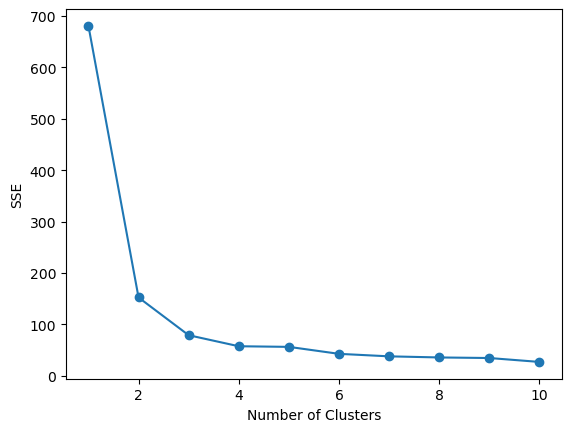

[680.8243999999996, 152.36870647733915, 78.94506582597728, 57.4732732654949, 56.25452709030101, 42.695191563275436, 37.82143557312252, 35.662872089314234, 34.56586570096572, 26.9612466993554]


In [3]:
import matplotlib.pyplot as plt
def elbow(x):
    sse=[]
    for i in range (1,11):
        km = KMeans(n_clusters=i, random_state=1)
        km.fit(x)
        sse.append(km.inertia_)
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
elbow(x)

In [8]:
km = KMeans (n_clusters=3, random_state=1)
km.fit(x)

new_labels = km.labels_
iris['cluster']=new_labels

iris.groupby('cluster')[['sepal length','sepal width','petal length','petal width']].mean()

,sepal length,sepal width,petal length,petal width
cluster,,,,
0,5.883607,2.740984,4.388525,1.434426
1,5.006000,3.418000,1.464000,0.244000
2,6.853846,3.076923,5.715385,2.053846


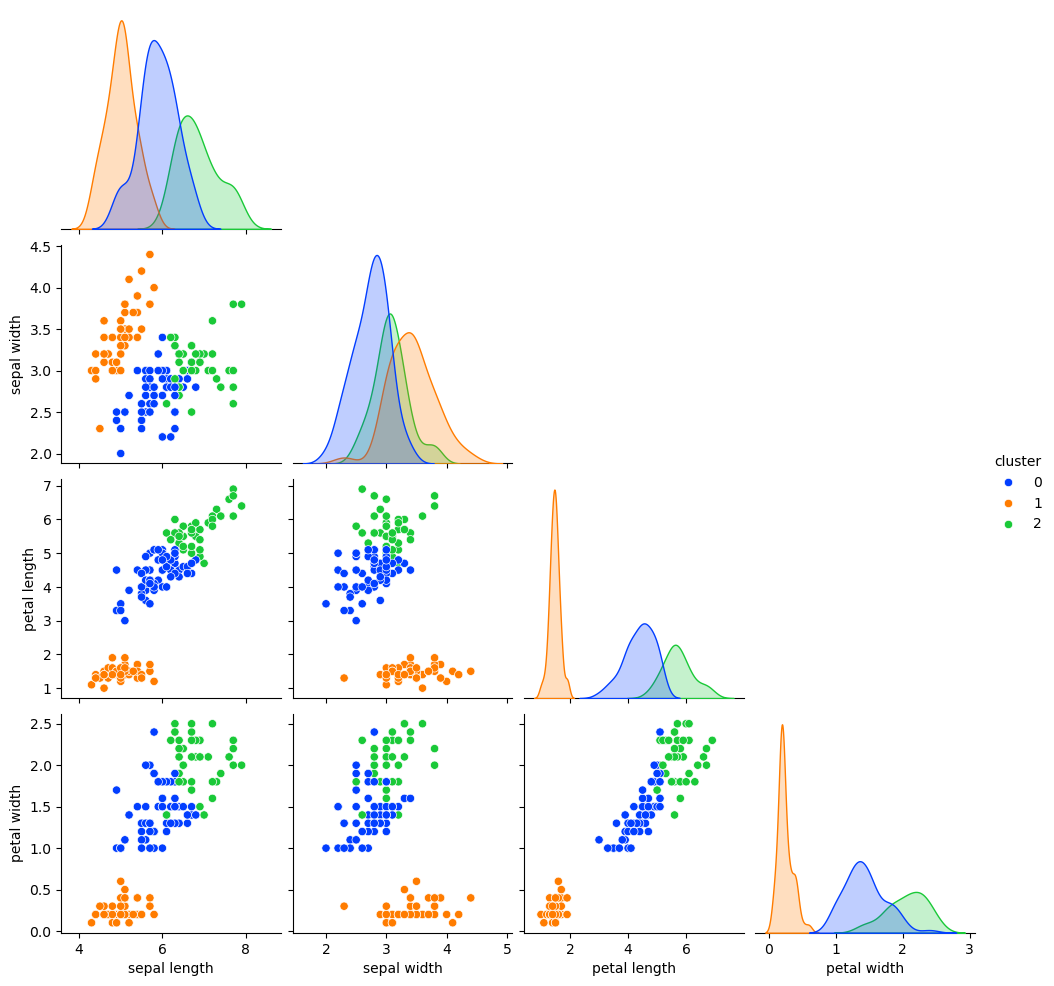

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot (iris, diag_kind = 'kde', hue='cluster', corner=True, palette='bright')
plt.show()

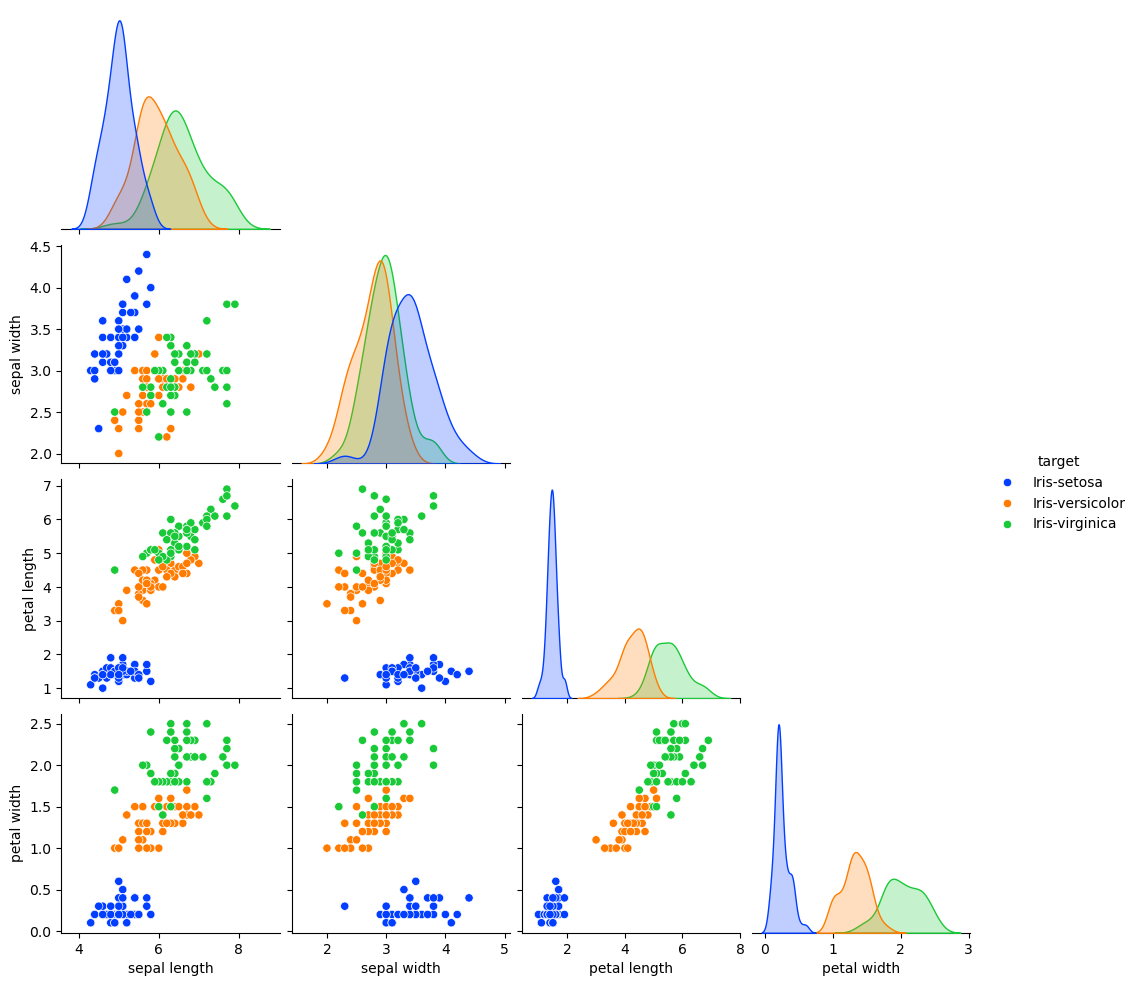

In [10]:
sns.pairplot (iris.drop(columns=['cluster']), diag_kind = 'kde', hue='target', corner=True, palette='bright')
plt.show()

#### **7-6-3. Clustering: 비계층적 군집 (혼합분포 EM 모델)**

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

iris=pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/iris.csv')
x = iris.drop('target', axis=1)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

gmm = GaussianMixture(n_components=3)
gmm.fit(x_scaled)
gmm_labels = gmm.predict(x_scaled)
gmm_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [13]:
x['cluster'] = gmm_labels
x.groupby('cluster')[['sepal length','sepal width','petal length','petal width']].mean()

,sepal length,sepal width,petal length,petal width
cluster,,,,
0,5.904444,2.775556,4.193333,1.293333
1,6.554545,2.950909,5.489091,1.989091
2,5.006000,3.418000,1.464000,0.244000


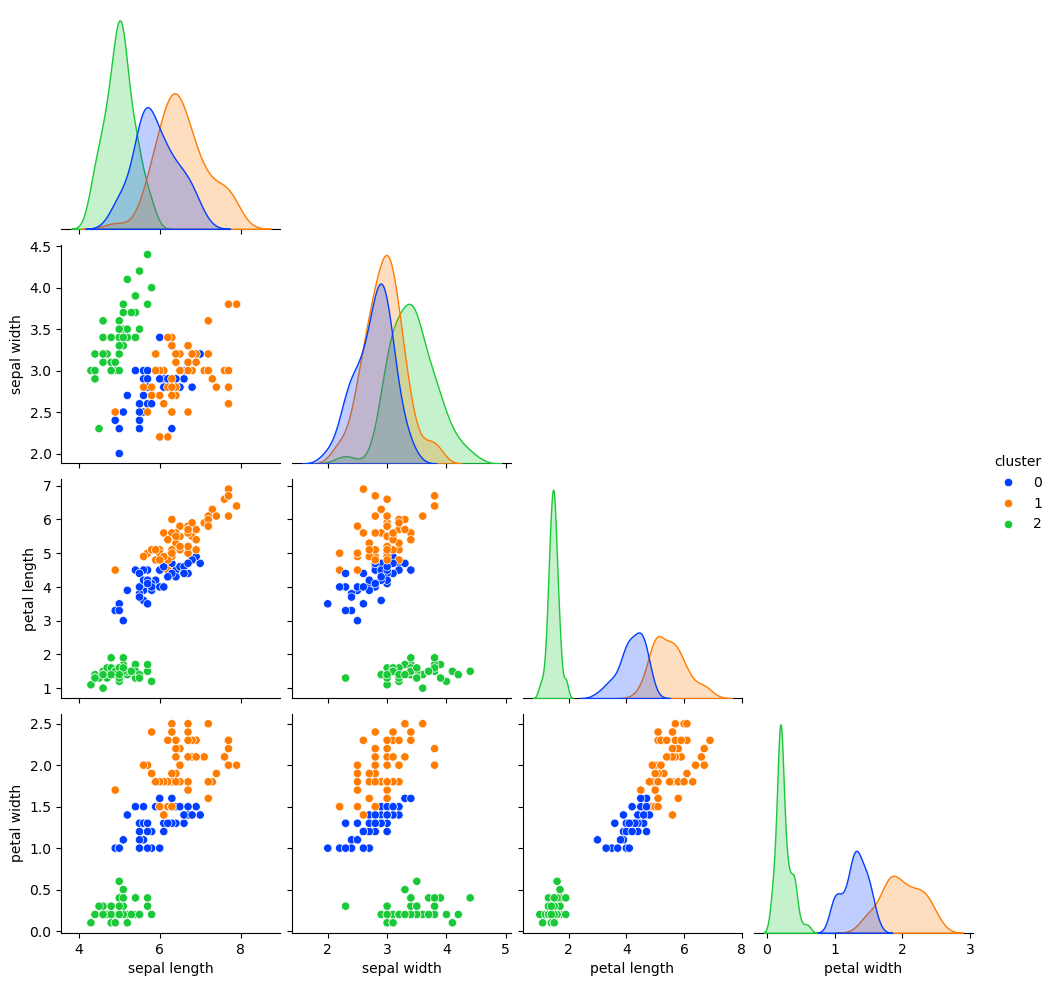

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot (x, diag_kind = 'kde', hue='cluster', corner=True, palette='bright')
plt.show()